In [2]:
import math
import asyncio
import submitit
import pickle
import sys
from pathlib import Path
import gc
from collections import defaultdict
from nilearn.connectome import sym_matrix_to_vec
# import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.stats import pearsonr
from sklearn.model_selection import (
    train_test_split,
)
from torch.utils.data import DataLoader, Dataset, Subset, TensorDataset
from tqdm.auto import tqdm
from augmentations import augs


/home/mind/mrenaudi/.local/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
matrix = np.load("/data/parietal/store2/work/mrenaudi/contrastive-reg-3/matrices/matrix_0.npy")

In [4]:
np.array_equal(matrix, matrix.T)

False

In [5]:
matrix.shape[0]==matrix.shape[1]

True

In [7]:
symmetric_count = 0
total_elements = 0
n = matrix.shape[0]    
    # Iterate over the upper triangular part of the matrix (excluding the diagonal)
for i in range(n):
        for j in range(i + 1, n):
            total_elements += 1
            if matrix[i, j] == matrix[j, i]:
                symmetric_count += 1
    


In [8]:
(symmetric_count / total_elements) * 100


67.50050050050051

In [12]:
import matplotlib.pyplot as plt


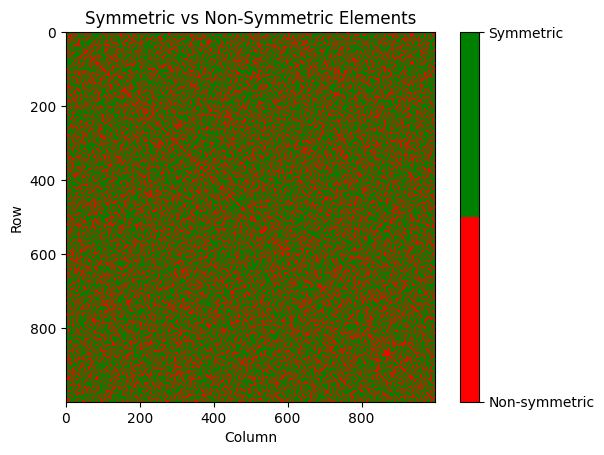

In [14]:
color_matrix = np.zeros(matrix.shape, dtype=int)
    
    # Iterate over the upper triangular part of the matrix (excluding the diagonal)
n = matrix.shape[0]
for i in range(n):
        for j in range(i + 1, n):
            if matrix[i, j] == matrix[j, i]:
                color_matrix[i, j] = 1
                color_matrix[j, i] = 1
            else : 
                color_matrix[i, j] = 0
                color_matrix[j, i] = 0
    
    # Create a custom colormap with two colors
cmap = plt.cm.colors.ListedColormap(['red', 'green'])
    
    # Create the plot
plt.imshow(color_matrix, cmap=cmap, interpolation='nearest')
    
    # Add color bar for reference
cbar = plt.colorbar(ticks=[0, 1])
cbar.ax.set_yticklabels(['Non-symmetric', 'Symmetric'])
    
    # Add labels and title
plt.title('Symmetric vs Non-Symmetric Elements')
plt.xlabel('Column')
plt.ylabel('Row')
    
    # Show the plot
plt.show()

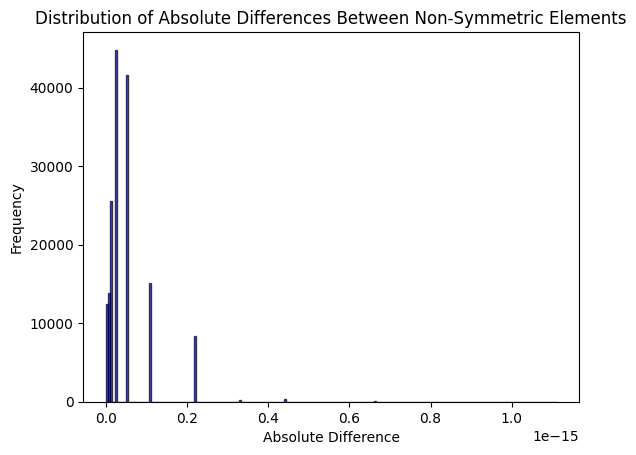

In [17]:
differences = []
    
    # Iterate over the upper triangular part of the matrix (excluding the diagonal)
n = matrix.shape[0]
for i in range(n):
        for j in range(i + 1, n):
            if matrix[i, j] != matrix[j, i]:
                differences.append(np.abs(matrix[i, j] - matrix[j, i]))
    
    # Plot the histogram of the absolute differences
plt.hist(differences, bins=200, color='blue', edgecolor='black', alpha=0.7)
    
    # Add labels and title
plt.title('Distribution of Absolute Differences Between Non-Symmetric Elements')
plt.xlabel('Absolute Difference')
plt.ylabel('Frequency')
    
    # Show the plot
plt.show()

In [16]:
matrix[3,4]

0.15787873794509974

In [50]:
matrix_rounded = np.round(matrix,9)

In [51]:
np.array_equal(matrix_rounded, matrix_rounded.T)

True

In [56]:
import os
import numpy as np

folder_path = "/data/parietal/store2/work/mrenaudi/contrastive-reg-3/matrices"

def load_matrices_from_folder(folder_path):
    """
    Load all matrices from the specified folder.
    
    Parameters:
    folder_path (str): The path to the folder containing matrix files.
    
    Returns:
    list: A list of numpy arrays representing the matrices.
    """
    matrices = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".npy"):  # Assuming the matrices are stored as .npy files
            file_path = os.path.join(folder_path, filename)
            matrix = np.load(file_path)
            matrices.append(matrix)
    return matrices

def is_symmetric(matrix):
   
    return np.array_equal(matrix, matrix.T)

def calculate_symmetric_proportion(folder_path):
    """
    Calculate the proportion of symmetric matrices in the specified folder.
    
    Parameters:
    folder_path (str): The path to the folder containing matrix files.
    
    Returns:
    float: The proportion of symmetric matrices.
    """
    matrices = load_matrices_from_folder(folder_path)
    symmetric_count = 0
    
    for matrix in matrices:
        # Round the matrix values to 9 decimal places
        rounded_matrix = np.round(matrix, 8)
        
        # Check if the rounded matrix is symmetric
        if is_symmetric(rounded_matrix):
            symmetric_count += 1
    
    total_matrices = len(matrices)
    if total_matrices == 0:
        return 0.0  # Avoid division by zero
    
    proportion = symmetric_count / total_matrices
    return proportion

# Example usage

proportion = calculate_symmetric_proportion(folder_path)
print(f"The proportion of symmetric matrices is: {proportion:.2%}")


The proportion of symmetric matrices is: 100.00%
